## Punto 3

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [86]:
def f(x,y):
    return (x * y**2) - (2 * y * x**-1) - x**-3

In [75]:
def Solucion(x):
    return (x**-2) + ( 2 /   (-2-( x**2) ) )

In [76]:
N = 25 # numero de puntos
x_Max = 10 # X maxima

In [77]:
t = np.linspace(2**0.5, x_Max , N)
h = t[1] - t[0]

In [78]:
yext = Solucion(t)

In [79]:
y3 = np.zeros_like(t)
y3[0] = 0

In [80]:
def GetEuler3(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)
        
        y[i] = y[i-1] + (1/6)*h*(k1+4*k2+k3)

In [81]:
GetEuler3(t,y3,h)

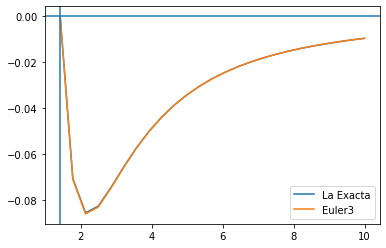

In [88]:
plt.plot(t,yext,label="La Exacta")
plt.plot(t,y3,label='Euler3')
plt.axvline(2**0.5) #Raiz de 2
plt.axhline(0.)
plt.legend()

In [83]:
def fc(z):
    return 1j*z

In [84]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)
    
theta = 0.

Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

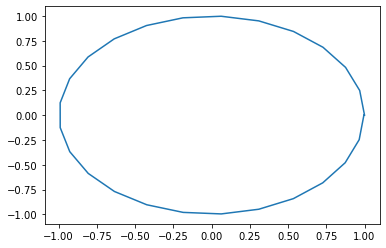

In [85]:
plt.plot(Re3, Im3)